In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from os import chdir
chdir("/Users/pilot/Desktop/archive")

In [ ]:
'''
Linear Regression without using sklearn

and using Sklearn
'''

In [2]:
# Preparing data by removing empty rows
def clean(df):
    nan_value = float("NaN")
    df.replace("", nan_value, inplace=True)
    df.dropna(subset=["y"], inplace=True)

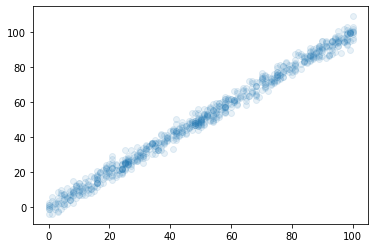

In [3]:
# Training Data
train = pd.read_csv("train.csv")
clean(train)
x_train = train["x"].values.reshape(-1,1)
y_train = train["y"].values.reshape(-1,1)
plt.scatter(x_train,y_train,alpha = 0.1)
plt.show()

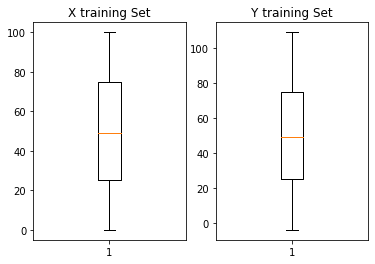

In [19]:
# finding Outliers in training set
plt.subplot(1,2,1)
plt.title("X training Set")
plt.boxplot(x_train)

plt.subplot(1,2,2)
plt.title("Y training Set")
plt.boxplot(y_train)
plt.show()

In [37]:
# Setting learning rate and number of iteration
# h(x) = theta_0 + theta_1 * x

alpha = 0.0001
iterations = 100

#theta[0] = bias
#theta[1] = weight
theta = [0,0]

In [38]:
def h_theta(x,y,theta):
    return (theta[0] + theta[1] * x - y)

In [41]:
def cost_function(x_train,y_train,theta):
    h = 0
    for i in range(len(x_train)):
        h += (h_theta(x_train[i], y_train[i],theta))**2
    return h / (2 * len(x_train))

In [35]:
def gradient_descent(x_train,y_train,theta,alpha):
    m = len (x_train)
    sum_i = 0
    sum_j = 0
    
    for i in range(m):
        sum_i += h_theta(x_train[i], y_train[i],theta)
        sum_j += x_train[i]*(h_theta(x_train[i], y_train[i],theta))

    theta_i = theta[0] - alpha * (sum_i) / m
    theta_j = theta[1] - alpha * (sum_j) / m
    updated_theta = [theta_i, theta_j]
    return updated_theta         

In [49]:
def Linear_Reg(x_train,y_train,alpha,iteration):
    m = len (x_train)
    theta = [0,0]
    cost=[]
    
    for i in range(iteration):
        theta = gradient_descent(x_train,y_train,theta,alpha)
        cost.append(cost_function(x_train,y_train,theta))
        
    return theta

In [50]:
Linear_Reg(x_train,y_train,alpha,iterations)

[array([0.01465811]), array([0.99882975])]

In [25]:
# Testing Data
test = pd.read_csv("test.csv")
clean(test)
x_test = test["x"].values.reshape(-1,1)
y_test = test["y"].values.reshape(-1,1)



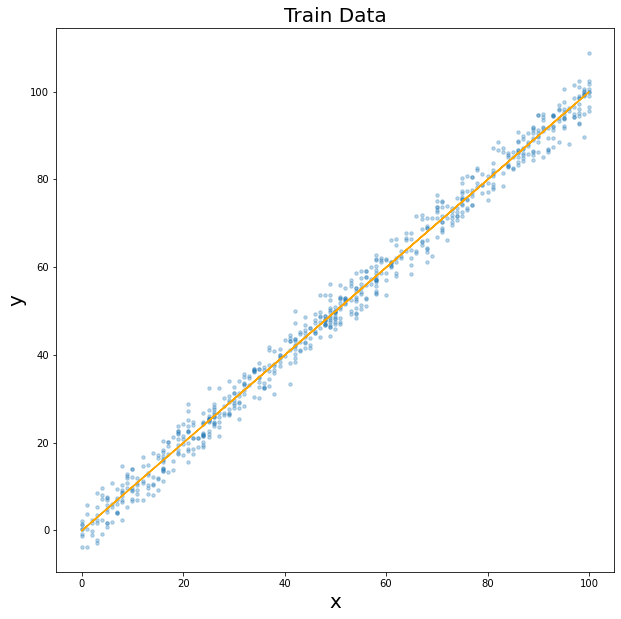

0.9888014444327563


In [27]:
#Linear Regression using Scikit
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(x_train, y_train, s=12, alpha = 0.3)
plt.plot(x_train, lin_reg.predict(x_train), color="orange")
plt.title("Train Data", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y", fontsize=20)
plt.show()

accuracy = lin_reg.score(x_test, y_test)
print(accuracy)